# Akantu Tutorial - Structural stability of the EPFL logo

## Problem description

![](https://www.economie-region-lausanne.ch/wp-content/uploads/2019/07/epfl-2-870x350.jpg)

## Loading Akantu's module

In [1]:
# loading Akantu
import akantu as aka
#loading numpy (useful for manipulating node/element fields)
import numpy as np

## Creating a material file for Akantu

In this tutorial we will consider an elastic constitutive law, with a stiffness matching a typical steel. 

The following file *material.dat* descrives such a constitutive law, which we write and then load thanks to *Akantu*'s parsing routines:

In [2]:
material_file = """
material elastic [
    name = steel
    rho = 7800     # density
    E   = 2.1e11   # young's modulus
    nu  = 0.3      # poisson's ratio
    finite_deformation = 1
]"""
# writing the material file
open('material.dat', 'w').write(material_file)
#reading the material file
material_file = 'material.dat'
aka.parseInput(material_file)

## Creating a discretization mesh

This part of the tutorial provides a geometric description (with Gmsh syntax) of the domain to model. 

*Gmsh* mesher will therefore be employed to generate a triangular mesh loadable with Akantu. 

In [3]:
# geometric parameters

w = 10.     # width (x-axis)
l = 5.      # length (y-axis)
h1 = 0.05    # characteristic mesh size at the hole
h2 = 0.3    # characteristic mesh size in corners
R = 2.      # radius of the hole

### Place the points a described on the schematic

In [4]:
mesh_file = """

//Merge "logo-epfl-1024x576.png";
lc = 10;
Point(1) = {151.7, 391.3, 0, lc};
Point(2) = {302.3, 391.8, 0, lc};
Point(3) = {302.7, 353.2, 0, lc};
Point(4) = {196.2, 352.1, 0, lc};
Point(5) = {196.2, 306.8, 0, lc};
Point(6) = {151.5, 306.5, 0, lc};
Point(7) = {293.5, 306.8, 0, lc};
Point(8) = {293, 267.8, 0, lc};
Point(9) = {196.6, 268.1, 0, lc};
Point(10) = {151.2, 183, 0, lc};
Point(11) = {197.1, 221.4, 0, lc};
Point(12) = {302, 220.9, 0, lc};
Point(13) = {302.5, 183, 0, lc};
Point(14) = {341.2, 391.2, 0, lc};
Point(15) = {341, 183, 0, lc};
Point(16) = {386.4, 183, 0, lc};
Point(17) = {386, 267.2, 0, lc};
Point(18) = {386.5, 306.5, 0, lc};
Point(19) = {386.6, 352.4, 0, lc};
Point(20) = {433.5, 352.4, 0, lc};
Point(21) = {433.5, 307, 0, lc};
Point(22) = {444.5, 391.7, 0, lc};
Point(23) = {445.5, 268.1, 0, lc};
Point(24) = {507.5, 329.9, 0, lc};
Point(25) = {536.4, 391.3, 0, lc};
Point(26) = {536.6, 306.2, 0, lc};
Point(27) = {536.2, 267.4, 0, lc};
Point(28) = {688.1, 391.5, 0, lc};
Point(29) = {688.8, 352.5, 0, lc};
Point(30) = {581.8, 352.5, 0, lc};
Point(31) = {679.5, 267.4, 0, lc};
Point(32) = {679.2, 306.9, 0, lc};
Point(33) = {537.2, 183, 0, lc};
Point(34) = {581.2, 183, 0, lc};
Point(35) = {580.9, 306.7, 0, lc};
Point(36) = {580.9, 268, 0, lc};
Point(37) = {151.2, 267.6, 0, lc};
Point(38) = {765.5, 391.6, 0, lc};
Point(39) = {765.7, 221.1, 0, lc};
Point(40) = {871.6, 221.5, 0, lc};
Point(41) = {872.7, 183, 0, lc};
Point(42) = {720.4, 183, 0, lc};
Point(43) = {720.1, 391.8, 0, lc};
Point(44) = {3.3, 571.6, 0, lc};
Point(45) = {2.1, -0.3, 0, lc};
Point(46) = {1022.7, 0.7, 0, lc};
Point(47) = {1023.1, 573.5, 0, lc};
Point(48) = {463.4, 329.1, 0, lc};

//+
Line(1) = {1, 2};
Line(2) = {1, 6};
Line(3) = {4, 5};
Line(4) = {2, 3};
Line(5) = {3, 4};
Line(6) = {5, 7};
Line(7) = {7, 8};
Line(8) = {8, 9};
Line(9) = {9, 11};
Line(10) = {11, 12};
Line(11) = {12, 13};
Line(12) = {13, 10};
Line(13) = {10, 37};
Line(14) = {37, 9};
Line(15) = {6, 5};
Line(16) = {5, 9};
Line(17) = {14, 15};
Line(18) = {15, 16};
Line(19) = {16, 17};
Line(20) = {17, 23};
Line(21) = {14, 22};
Line(22) = {19, 18};
Line(23) = {19, 20};
Line(24) = {18, 21};
Spline(25) = {20, 48, 21};
Spline(26) = {22, 24, 23};
Line(27) = {25, 26};
Line(28) = {25, 28};
Line(29) = {28, 29};
Line(30) = {29, 30};
Line(31) = {30, 35};
Line(32) = {35, 32};
Line(33) = {32, 31};
Line(34) = {31, 36};
Line(35) = {36, 35};
Line(36) = {35, 26};
Line(37) = {27, 36};
Line(38) = {27, 33};
Line(39) = {33, 34};
Line(40) = {34, 36};
Line(41) = {43, 38};
Line(42) = {38, 39};
Line(43) = {39, 40};
Line(44) = {40, 41};
Line(45) = {41, 42};
Line(46) = {42, 43};

Curve Loop(1) = {1, 4, 5, 3, -15, -2};
Plane Surface(1) = {-1};
Curve Loop(2) = {6, 7, 8, -16};
Plane Surface(2) = {-2};
Curve Loop(3) = {14, 9, 10, 11, 12, 13};
Plane Surface(3) = {-3};
Curve Loop(4) = {21, 26, -20, -19, -18, -17};
Curve Loop(5) = {23, 25, -24, -22};
Plane Surface(4) = {-4, -5};
Curve Loop(6) = {28, 29, 30, 31, 36, -27};
Plane Surface(5) = {-6};
Curve Loop(7) = {32, 33, 34, 35};
Plane Surface(6) = {-7};
Curve Loop(8) = {37, -40, -39, -38};
Plane Surface(7) = {-8};
Curve Loop(9) = {41, 42, 43, 44, 45, 46};
Plane Surface(8) = {-9};

Physical Line("top") = {1, 21, 28, 41};
Physical Line("bottom") = {12, 18, 39, 45};

Physical Surface("E") = {1, 2, 3};
Physical Surface("P") = {4};
Physical Surface("F") = {5, 6, 7};
Physical Surface("L") = {8};

"""

### Write the file and generate the mesh

In [5]:
open('epfl_logo.geo', 'w').write(mesh_file)
import subprocess
ret = subprocess.run("gmsh -2 -order 1 -o epfl_logo.msh epfl_logo.geo", shell=True)
if ret.returncode:
    print("Beware, gmsh could not run: mesh is not regenerated")
else:
    print("Mesh generated")

Info    : Running 'gmsh -2 -order 1 -o epfl_logo.msh epfl_logo.geo' [Gmsh 4.8.4, 1 node, max. 1 thread]
Info    : Started on Thu May 18 09:23:22 2023
Info    : Reading 'epfl_logo.geo'...
Info    : Done reading 'epfl_logo.geo'
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 10%] Meshing curve 4 (Line)
Info    : [ 10%] Meshing curve 5 (Line)
Info    : [ 20%] Meshing curve 6 (Line)
Info    : [ 20%] Meshing curve 7 (Line)
Info    : [ 20%] Meshing curve 8 (Line)
Info    : [ 20%] Meshing curve 9 (Line)
Info    : [ 20%] Meshing curve 10 (Line)
Info    : [ 30%] Meshing curve 11 (Line)
Info    : [ 30%] Meshing curve 12 (Line)
Info    : [ 30%] Meshing curve 13 (Line)
Info    : [ 30%] Meshing curve 14 (Line)
Info    : [ 40%] Meshing curve 15 (Line)
Info    : [ 40%] Meshing curve 16 (Line)
Info    : [ 40%] Meshing curve 17 (Line)
Info    : [ 40%] Meshing curve 18 (Line)
Info    : [ 40%] Mesh

## Reading the mesh with Akantu

You need to specify the dimension and filename of the mesh to load

In [6]:
# reading the mesh
spatial_dimension = 2    
mesh_file = 'epfl_logo.msh'
mesh = aka.Mesh(spatial_dimension)
mesh.read(mesh_file)
mesh.getNodes()[:] *= 0.01

## Configuring the Solver

### Creating a *SolidMechanicsModel* model

In [7]:
# creating the solid mechanics model
model = aka.SolidMechanicsModel(mesh)

### Associating an explicit dynamics solver

In [8]:
# initialize a static solver
model.initFull(_analysis_method=aka._explicit_lumped_mass)

## Declaring boundary conditions

In [9]:
# set the displacement/Dirichlet boundary conditions
model.applyBC(aka.FixedValue(0.0, aka._x), "bottom")
model.applyBC(aka.FixedValue(0.0, aka._y), "bottom")

# set the force/Neumann boundary conditions
# model.getExternalForce()[:] = 0
# trac = np.zeros(spatial_dimension)
# trac[int(aka._x)] = 1 # Newtons/m^2
# model.applyBC(aka.FromTraction(trac), "top")
model.solveStep()

fext = model.getExternalForce()
mass = model.getMass()
g = 10
fext[:, aka._y]+= -g *mass[:, aka._y]

## Solves the problem and save the results

In [10]:
# compute the solution
model.solveStep()

## Ploting the results

In this tutorial, the results are presented using **matplotlib**.

Therefore we have to load several convenient modules

In [11]:
# import the pyplot submodule to draw figures
import matplotlib.pyplot as plt
# import triangluation routine to plot meshes
import matplotlib.tri as tri
# setting a default image size large enough
plt.rcParams['figure.figsize'] = [10, 10]

### Extracting the mesh

In [12]:
# extract the mesh
mesh = model.getMesh()
conn = mesh.getConnectivity(aka._triangle_3)
nodes = mesh.getNodes()
triangles = tri.Triangulation(nodes[:, 0], nodes[:, 1], conn)

### Extracting the displacement field

In [13]:
# extract the displacements
u = model.getDisplacement()
blocked_dofs = model.getBlockedDOFs()

## Dumping paraview files

It is also possible to generate **Paraview** files to scrutinize the results. 
This can be done after specifying the necessary meta-data as follows:

In [14]:
# specify what field to output into paraview files
model.setBaseName("logo_epfl")
model.addDumpFieldVector("displacement")
model.addDumpFieldVector('velocity')
model.addDumpFieldVector("external_force")
model.addDumpField("strain")
model.addDumpField("stress")
model.addDumpField("blocked_dofs")

Then an actual writing of the **Paraview** files is made with:

In [15]:
# choose the timestep
model.setTimeStep(model.getStableTimeStep())
# set maximum number of iteration
maxsteps = 100000
# solve
for i in range(0, maxsteps):
    if i % 10000 == 0:
        print('step {0}/{1}'.format(i, maxsteps))
    if i % 1000 == 0:
        model.dump()
    model.solveStep('explicit_lumped')

step 0/100000
step 10000/100000
step 20000/100000
step 30000/100000
step 40000/100000
step 50000/100000
step 60000/100000
step 70000/100000
step 80000/100000
step 90000/100000


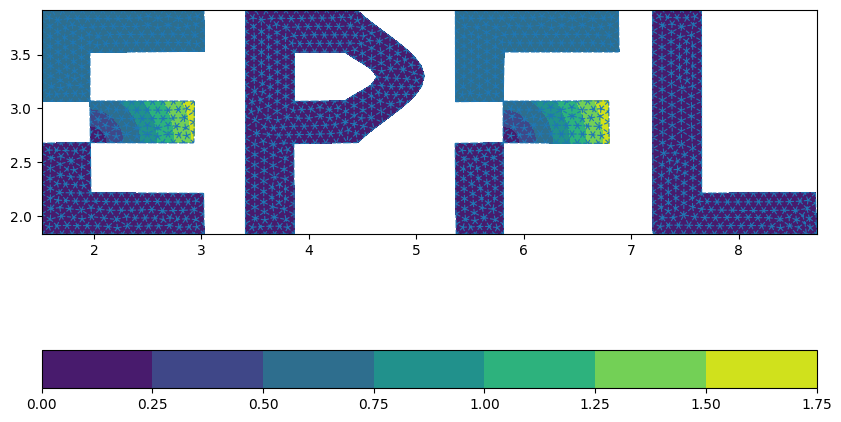

In [16]:
# plot displacement field
f = np.linalg.norm(model.getDisplacement(), axis=1)
plt.axes().set_aspect('equal')
f_plot = plt.tricontourf(triangles, f)
t = plt.triplot(triangles, '--', lw=.8)
cbar = plt.colorbar(f_plot, orientation="horizontal")

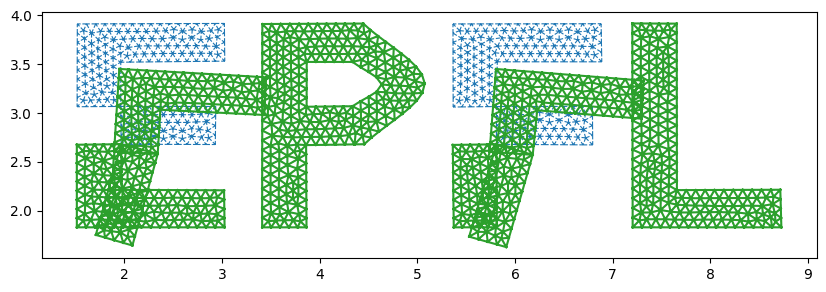

In [17]:
# plot the result
plt.axes().set_aspect('equal')
# plots the pristine state
t = plt.triplot(triangles, '--', lw=.8)
# plots an exagerating view of the strained mesh
t = plt.triplot(nodes[:, 0]+u[:, 0], nodes[:, 1]+u[:, 1], triangles=conn)

In [29]:
def generate_frame(plate_mesh, step , plotter, camera, style='wireframe', magnification=1, parallel=True, contours=False):
    plotter.background_color = 'white'
    plate_warped = plate_mesh.warp_by_vector('displacement')
    plate_warped.set_active_scalars("stress")
    plotter.add_mesh(plate_warped, scalars='stress', show_scalar_bar=True, clim=[0., 2.3e6], scalar_bar_args={'color': 'black'}, style=style)
    if camera is None:
        plotter.view_xy()

In [30]:
import tools
tools.make_video("logo_epfl", generate_frame, framerate=20, width="100%", magnification=50)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.39it/s]
